# FocusGAN ECE 285 Final Project

## imports

In [57]:
import zipfile
import requests
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch

notebook_path = os.getcwd()
print("Notebook path:", notebook_path)

Notebook path: /home/salsulai/private/ECE 285/Final Project


### Zip Extraction

In [16]:
#file paths
test_path = '/home/salsulai/private/ECE 285/Final Project/testSet.zip'  
train_path = '/home/salsulai/private/ECE 285/Final Project/trainSet.zip'
extract_dir = '/home/salsulai/private/ECE 285/Final Project'  

# Extraction
with zipfile.ZipFile(test_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Dataset Extraction Successful")

Dataset Extraction Successful


## Visualize CAT2000 Training Dataset

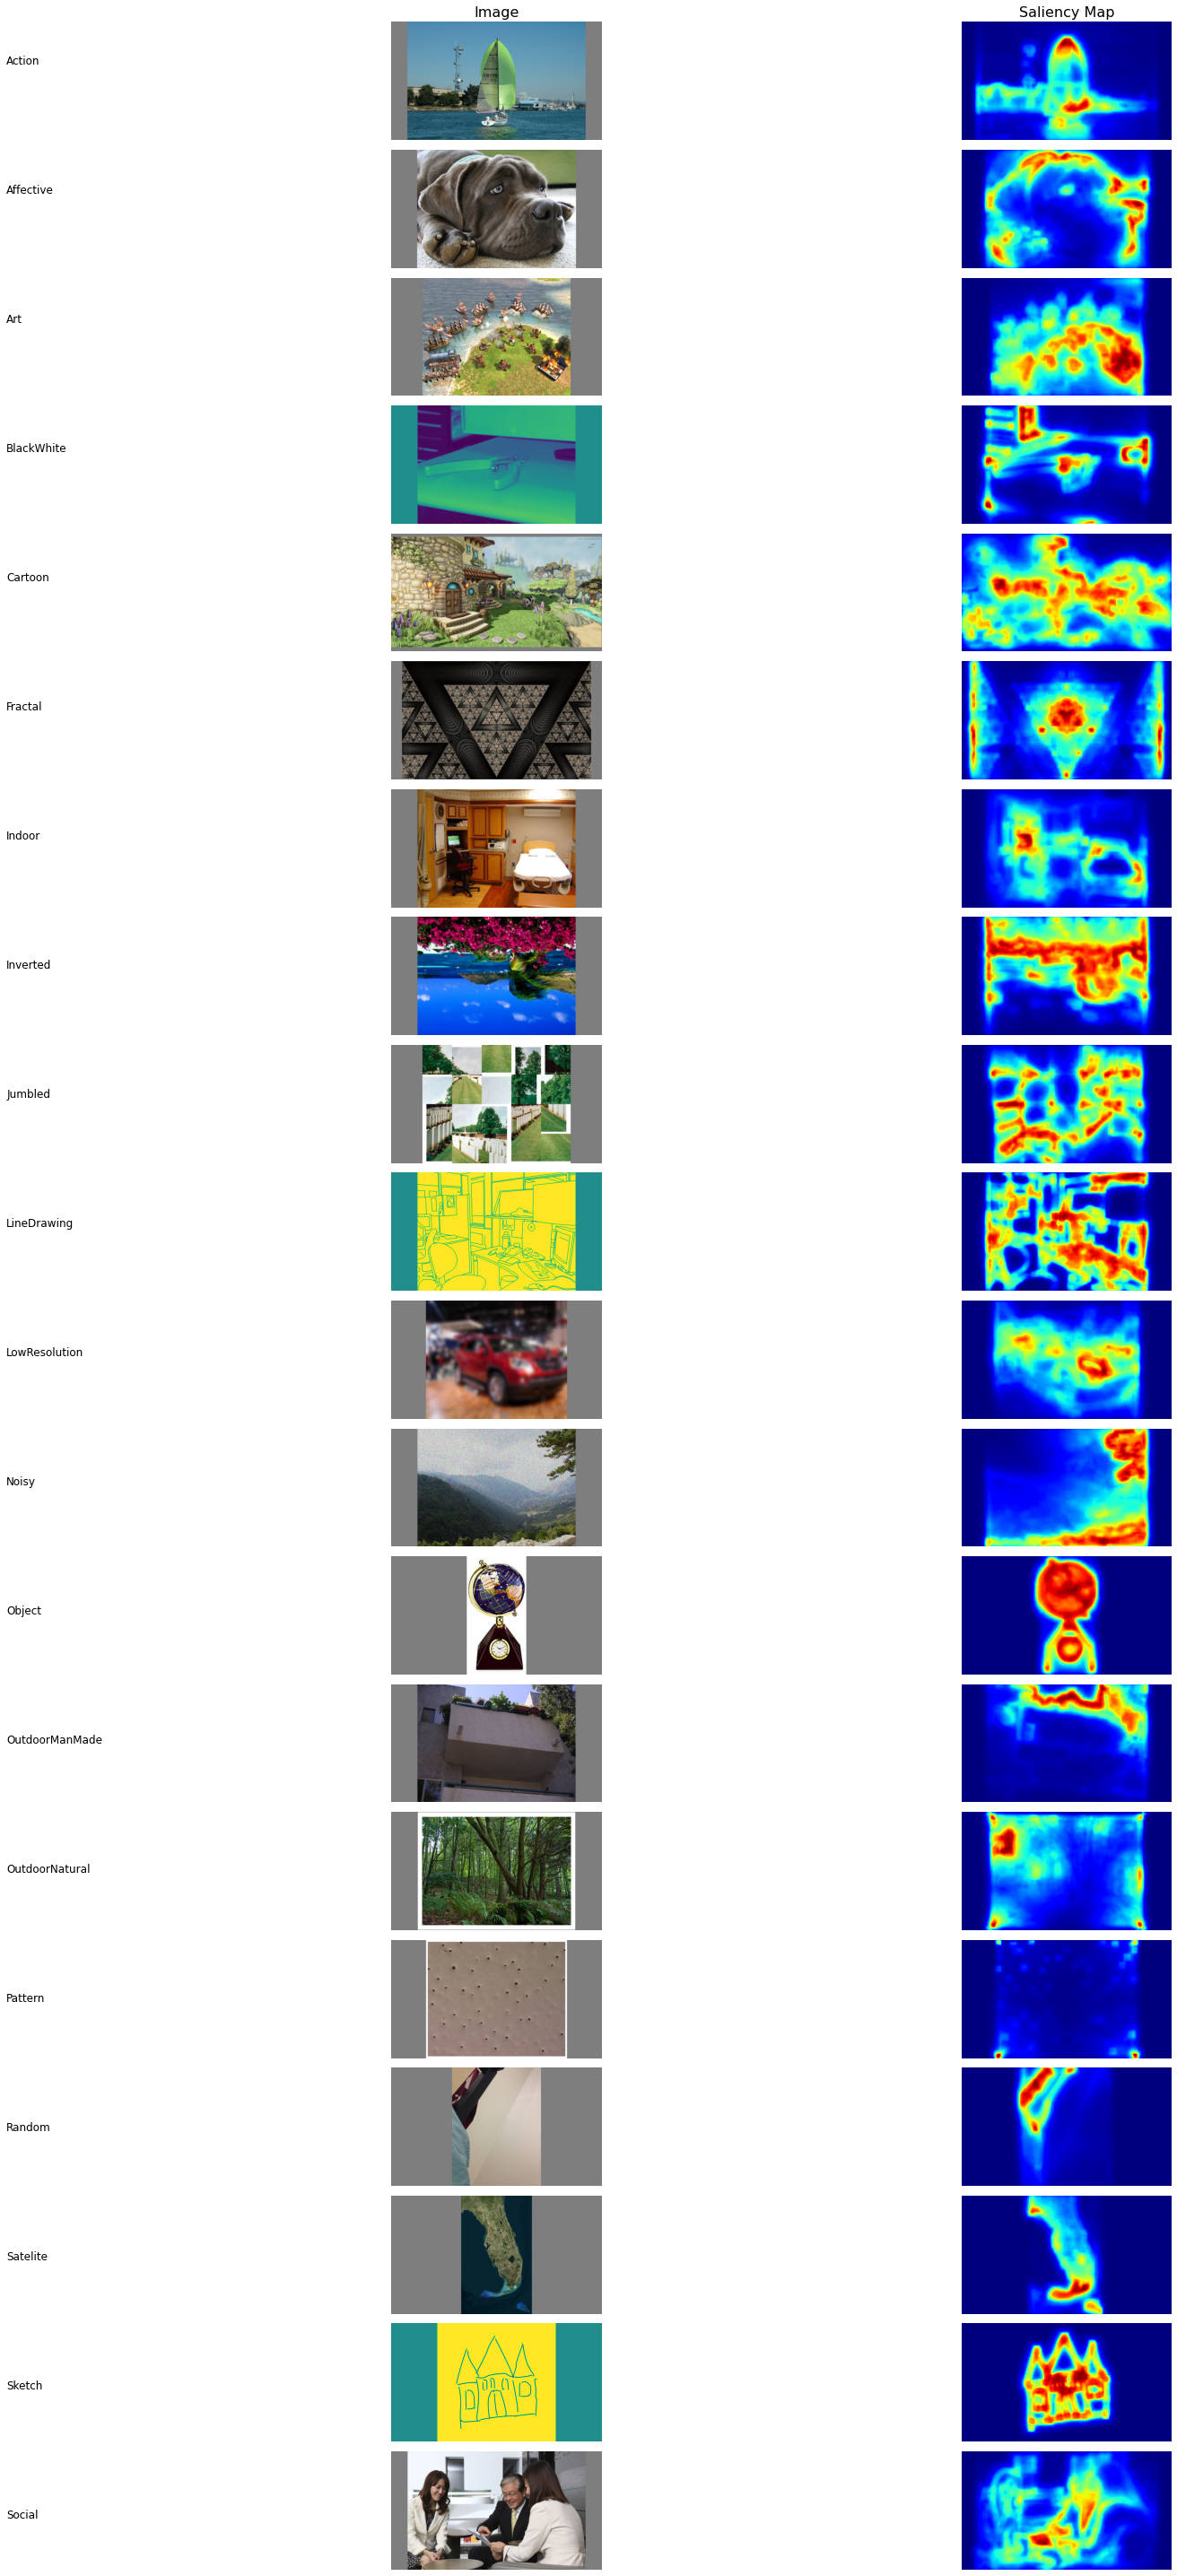

In [42]:
Categories = ["Action","Affective","Art","BlackWhite","Cartoon","Fractal","Indoor","Inverted","Jumbled","LineDrawing",
"LowResolution","Noisy","Object","OutdoorManMade","OutdoorNatural","Pattern","Random","Satelite","Sketch","Social"]



file_list = os.listdir(extract_dir + "/trainSet/Stimuli/Action")
random_image = random.choice(file_list)

rows = 20
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(24, 40))
x = 0
for i in Categories:
    file_list_stim = os.listdir(extract_dir + "/trainSet/Stimuli/" + i)
    random_image = random.choice(file_list_stim)
    image_path = os.path.join(extract_dir + "/trainSet/Stimuli/" + i, random_image)
    saliency_map = random_image.replace(".jpg","")+ "_SaliencyMap.jpg"
    saliency_map_path = os.path.join(extract_dir + "/trainSet/Stimuli/" + i + "/Output/", saliency_map ) 
    image = plt.imread(image_path)
    saliency_map = plt.imread(saliency_map_path)
    
    #display random image from trainset category
    axes[x, 0].imshow(image)
    axes[x, 0].axis('off')
    
    #display its respective saliency map
    axes[x, 1].imshow(saliency_map, cmap='jet')  # Adjust cmap as needed
    axes[x, 1].axis('off')
    
    #Column title 
    if x == 0:
        axes[x, 0].set_title('Image', fontsize=16)
        axes[x, 1].set_title('Saliency Map', fontsize=16)

    # Row labels
    fig.text(0, (rows-x-0.5)/rows, i, ha='left', va='center', fontsize=12)
    
    x += 1
    
    
plt.tight_layout()
plt.show()
    


## Dataloader and Device Setup

In [58]:

#Function to create data_list which is list of tuples (image_path,ground_truth_path) 
def get_data_list(root_directory):
    data_list = []
    for category in Categories:
        category_dir = os.path.join(root_directory,category)
        ground_truth_dir = os.path.join(category_dir,"Output")
        
        for image in os.listdir(category_dir):
            if image.endswith("jpg"):
                image_path = os.path.join(category_dir,image)
                ground_truth_path = os.path.join(ground_truth_dir,image.replace(".jpg","")+ "_SaliencyMap.jpg")
            
                data_list.append((image_path,ground_truth_path))
        
    return data_list

#data_list from training data
train_dir = '/home/salsulai/private/ECE 285/Final Project/trainSet/Stimuli/'
data_list = get_data_list(train_dir)

#split data_list into training and validation datasets
train_data,val_data = train_test_split(data_list, test_size = 0.2, random_state = 28) #random seed same for debugging purposes

#test set 
test_dir = '/home/salsulai/private/ECE 285/Final Project/testSet/Stimuli/'
test_data = get_data_list(test_dir)


#2000 test, 2000 training, and 400 validation seems unreasonable 
#get full data list 
full_data_list = data_list + test_data 

#split into 80, 20, 20
train_data, temp = train_test_split(full_data_list, test_size = 0.2, random_state = 28) #random seed same for debugging purposes
test_data, val_data = train_test_split(temp, test_size = 0.5, random_state = 28) #random seed same for debugging purposes



print("Training Set Size:", len(train_data))
print("Validation Set Size:", len(val_data))
print("Test Set Size:", len(test_data))

train_loader = torch.utils.data.DataLoader(     #might need to change batch_size depending on training
    train_data, batch_size=1, shuffle=True
)
val_loader = torch.utils.data.DataLoader(
    val_data, batch_size=1, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=1, shuffle=False
)



USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)
    
    

Training Set Size: 3200
Validation Set Size: 400
Test Set Size: 400
using device: cuda


## Generator

## U-Net Generator 

## Discriminator 

## Loss Functions and Optimizers

## Trainer

## Results